# tutorials for NN

Following these tutorials (in order)
* LSTM Time Series Forecasting https://www.youtube.com/watch?v=c0k-YLQGKjY
* Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs https://www.youtube.com/watch?v=kGdbPnMCdOg

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-11-07 14:48:18.728509: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 14:48:18.762321: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 14:48:18.762344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 14:48:18.762378: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 14:48:18.769138: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 14:48:18.769466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
df = pd.read_pickle('../data/pickled_data/AFL259_short.pkl')
df.reset_index(inplace=True,drop=True)
df.head(15)

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
0,2006-02-07,91.0100,21.65,9420.0,0.00,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.0000,0.00,0.0
1,2006-02-08,91.0429,21.64,9380.0,0.00,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.0000,0.00,0.0
2,2006-02-09,91.1096,21.58,9210.0,0.00,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.7175,17.22,0.0
3,2006-02-10,91.1954,21.46,8830.0,0.00,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.0000,0.00,0.0
4,2006-02-11,91.3012,21.36,8550.0,0.00,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.0000,0.00,0.0
5,2006-02-12,91.4004,21.28,8330.0,0.00,31.932083,43.92,24.57,1035.333333,68.041667,87.0,44.0,6.179583,9.17,3.36,0.0000,0.00,0.0
6,2006-02-13,91.5129,21.10,7820.0,0.10,31.004848,35.42,26.37,1025.878788,91.121212,96.0,81.0,7.274242,19.46,0.00,0.0000,0.00,0.0
7,2006-02-14,91.6071,20.97,7460.0,0.00,25.755417,35.42,18.34,1021.125000,76.083333,98.0,51.0,7.147917,10.29,3.36,0.0000,0.00,0.0
8,2006-02-15,91.7167,20.91,7300.0,0.00,25.828750,35.62,17.37,1019.750000,66.083333,88.0,33.0,6.552083,10.29,3.36,0.0000,0.00,0.0
9,2006-02-16,91.7925,20.81,7040.0,0.06,22.394400,27.81,12.18,1023.360000,65.240000,85.0,31.0,13.198800,26.17,2.24,8.4468,33.11,0.0


In [3]:
df.index = df.date
df

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
date,,,,,,,,,,,,,,,,,,
2006-02-07,2006-02-07,91.0100,21.65,9420.0,0.0,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.000000,0.00,0.0
2006-02-08,2006-02-08,91.0429,21.64,9380.0,0.0,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.000000,0.00,0.0
2006-02-09,2006-02-09,91.1096,21.58,9210.0,0.0,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.717500,17.22,0.0
2006-02-10,2006-02-10,91.1954,21.46,8830.0,0.0,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.000000,0.00,0.0
2006-02-11,2006-02-11,91.3012,21.36,8550.0,0.0,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-02,2018-06-02,79.4696,21.84,10000.0,0.0,62.812083,77.25,46.35,1022.750000,48.333333,83.0,24.0,6.976250,11.50,3.44,0.000000,0.00,0.0
2018-06-03,2018-06-03,80.0721,21.59,9240.0,0.0,69.826250,86.25,52.66,1013.875000,46.416667,79.0,23.0,10.141667,21.92,3.44,3.165833,29.97,0.0
2018-06-04,2018-06-04,80.4046,21.50,8970.0,0.0,62.956250,71.67,56.35,1012.833333,41.666667,65.0,18.0,14.850000,23.04,8.05,4.030417,28.77,0.0


In [4]:
df.index

DatetimeIndex(['2006-02-07', '2006-02-08', '2006-02-09', '2006-02-10',
               '2006-02-11', '2006-02-12', '2006-02-13', '2006-02-14',
               '2006-02-15', '2006-02-16',
               ...
               '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31',
               '2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06'],
              dtype='datetime64[ns]', name='date', length=4503, freq=None)

<Axes: xlabel='date'>

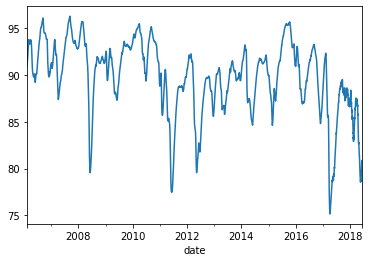

In [5]:
well = df.avg_well_depth
well.plot()

In [6]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X, y = df_to_X_y(well, WINDOW_SIZE)
X.shape, y.shape

((4498, 5, 1), (4498,))

### Train Test Split

In [8]:
X_train, y_train = X[:3498], y[:3498]
X_val, y_val = X[3498:3998], y[3498:3998]
X_test, y_test = X[3998:], y[3998:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3498, 5, 1), (3498,), (500, 5, 1), (500,), (500, 5, 1), (500,))

In [9]:
X_train, y_train

(array([[[91.01  ],
         [91.0429],
         [91.1096],
         [91.1954],
         [91.3012]],
 
        [[91.0429],
         [91.1096],
         [91.1954],
         [91.3012],
         [91.4004]],
 
        [[91.1096],
         [91.1954],
         [91.3012],
         [91.4004],
         [91.5129]],
 
        ...,
 
        [[95.4479],
         [95.4433],
         [95.4413],
         [95.4196],
         [95.4054]],
 
        [[95.4433],
         [95.4413],
         [95.4196],
         [95.4054],
         [95.3908]],
 
        [[95.4413],
         [95.4196],
         [95.4054],
         [95.3908],
         [95.3604]]]),
 array([91.4004, 91.5129, 91.6071, ..., 95.3908, 95.3604, 95.3237]))

### Tensorflow things

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

## Build single variable model

In [11]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-07 14:48:44.883400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-07 14:48:44.885536: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
cp = ModelCheckpoint('meremodel1/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp])

Epoch 1/50
100/110 [==========================>...] - ETA: 0s - loss: 6891.6743 - root_mean_squared_error: 83.0161INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 4s 22ms/step - loss: 6729.4316 - root_mean_squared_error: 82.0331 - val_loss: 4812.7148 - val_root_mean_squared_error: 69.3737
Epoch 2/50
100/110 [==========================>...] - ETA: 0s - loss: 2884.1689 - root_mean_squared_error: 53.7045INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 2744.7920 - root_mean_squared_error: 52.3908 - val_loss: 1142.4561 - val_root_mean_squared_error: 33.8002
Epoch 3/50
100/110 [==========================>...] - ETA: 0s - loss: 511.9675 - root_mean_squared_error: 22.6267INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 478.5016 - root_mean_squared_error: 21.8747 - val_loss: 104.9965 - val_root_mean_squared_error: 10.2468
Epoch 4/50
 98/110 [=========================>....] - ETA: 0s - loss: 39.9934 - root_mean_squared_error: 6.3240INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 37.4833 - root_mean_squared_error: 6.1224 - val_loss: 10.5780 - val_root_mean_squared_error: 3.2524
Epoch 5/50
 98/110 [=========================>....] - ETA: 0s - loss: 12.6141 - root_mean_squared_error: 3.5516INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.4397 - root_mean_squared_error: 3.5270 - val_loss: 7.8031 - val_root_mean_squared_error: 2.7934
Epoch 6/50
 95/110 [========================>.....] - ETA: 0s - loss: 9.9068 - root_mean_squared_error: 3.1475 INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 9.8112 - root_mean_squared_error: 3.1323 - val_loss: 5.8108 - val_root_mean_squared_error: 2.4106
Epoch 7/50
 95/110 [========================>.....] - ETA: 0s - loss: 7.3644 - root_mean_squared_error: 2.7137INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 7.0409 - root_mean_squared_error: 2.6535 - val_loss: 3.5571 - val_root_mean_squared_error: 1.8860
Epoch 8/50
100/110 [==========================>...] - ETA: 0s - loss: 3.8500 - root_mean_squared_error: 1.9621INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 3.6996 - root_mean_squared_error: 1.9234 - val_loss: 1.4927 - val_root_mean_squared_error: 1.2218
Epoch 9/50
 96/110 [=========================>....] - ETA: 0s - loss: 1.1913 - root_mean_squared_error: 1.0915INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 1.1008 - root_mean_squared_error: 1.0492 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6734
Epoch 10/50
 95/110 [========================>.....] - ETA: 0s - loss: 0.3304 - root_mean_squared_error: 0.5748INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.3144 - root_mean_squared_error: 0.5607 - val_loss: 0.1663 - val_root_mean_squared_error: 0.4078
Epoch 11/50
 98/110 [=========================>....] - ETA: 0s - loss: 0.1818 - root_mean_squared_error: 0.4264INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.1822 - root_mean_squared_error: 0.4268 - val_loss: 0.1354 - val_root_mean_squared_error: 0.3680
Epoch 12/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1421 - root_mean_squared_error: 0.3770 - val_loss: 0.1830 - val_root_mean_squared_error: 0.4277
Epoch 13/50
100/110 [==========================>...] - ETA: 0s - loss: 0.1328 - root_mean_squared_error: 0.3644INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1322 - root_mean_squared_error: 0.3636 - val_loss: 0.0816 - val_root_mean_squared_error: 0.2857
Epoch 14/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1178 - root_mean_squared_error: 0.3432 - val_loss: 0.0988 - val_root_mean_squared_error: 0.3143
Epoch 15/50
100/110 [==========================>...] - ETA: 0s - loss: 0.1165 - root_mean_squared_error: 0.3413INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.1165 - root_mean_squared_error: 0.3414 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2694
Epoch 16/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0926 - root_mean_squared_error: 0.3042INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0922 - root_mean_squared_error: 0.3037 - val_loss: 0.0624 - val_root_mean_squared_error: 0.2499
Epoch 17/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0931 - root_mean_squared_error: 0.3051INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0920 - root_mean_squared_error: 0.3033 - val_loss: 0.0568 - val_root_mean_squared_error: 0.2383
Epoch 18/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0887 - root_mean_squared_error: 0.2978 - val_loss: 0.0615 - val_root_mean_squared_error: 0.2480
Epoch 19/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0862 - root_mean_squared_error: 0.2936 - val_loss: 0.1223 - val_root_mean_squared_error: 0.3497
Epoch 20/50
 96/110 [=========================>....] - ETA: 0s - loss: 0.0873 - root_mean_squared_error: 0.2955INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0878 - root_mean_squared_error: 0.2963 - val_loss: 0.0553 - val_root_mean_squared_error: 0.2352
Epoch 21/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.0786 - root_mean_squared_error: 0.2804INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0778 - root_mean_squared_error: 0.2789 - val_loss: 0.0527 - val_root_mean_squared_error: 0.2295
Epoch 22/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0916 - root_mean_squared_error: 0.3026 - val_loss: 0.1078 - val_root_mean_squared_error: 0.3283
Epoch 23/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0807 - root_mean_squared_error: 0.2842 - val_loss: 0.0690 - val_root_mean_squared_error: 0.2626
Epoch 24/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0752 - root_mean_squared_error: 0.2743INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0735 - root_mean_squared_error: 0.2712 - val_loss: 0.0524 - val_root_mean_squared_error: 0.2289
Epoch 25/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0732 - root_mean_squared_error: 0.2706 - val_loss: 0.0689 - val_root_mean_squared_error: 0.2625
Epoch 26/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0723 - root_mean_squared_error: 0.2689 - val_loss: 0.0588 - val_root_mean_squared_error: 0.2424
Epoch 27/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0886 - root_mean_squared_error: 0.2976 - val_loss: 0.0770 - val_root_mean_squared_error: 0.2776
Epoch 28/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0682 - root_mean_squared_error: 0.2612 - val_loss: 0.0966 - val_root_mean_squared_error: 0.3109
Epoch 29/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0769 - root_mean_squared_error: 0.2773 - val_loss: 0.1070 - val_root_

INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0638 - root_mean_squared_error: 0.2525 - val_loss: 0.0472 - val_root_mean_squared_error: 0.2172
Epoch 32/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0672 - root_mean_squared_error: 0.2593 - val_loss: 0.0900 - val_root_mean_squared_error: 0.2999
Epoch 33/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0960 - root_mean_squared_error: 0.3099 - val_loss: 0.0663 - val_root_mean_squared_error: 0.2575
Epoch 34/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0947 - root_mean_squared_error: 0.3078 - val_loss: 0.1993 - val_root_mean_squared_error: 0.4465
Epoch 35/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0771 - root_mean_squared_error: 0.2777 - val_loss: 0.0480 - val_root_mean_squared_error: 0.2191
Epoch 36/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0693 - root_mean_squared_error: 0.2632 - val_loss: 0.1087 - val_root_

INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0697 - root_mean_squared_error: 0.2641 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2043
Epoch 40/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0658 - root_mean_squared_error: 0.2565 - val_loss: 0.0458 - val_root_mean_squared_error: 0.2140
Epoch 41/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0598 - root_mean_squared_error: 0.2444 - val_loss: 0.0694 - val_root_mean_squared_error: 0.2635
Epoch 42/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0751 - root_mean_squared_error: 0.2741 - val_loss: 0.0803 - val_root_mean_squared_error: 0.2834
Epoch 43/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0673 - root_mean_squared_error: 0.2595 - val_loss: 0.0709 - val_root_mean_squared_error: 0.2662
Epoch 44/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0672 - root_mean_squared_error: 0.2592 - val_loss: 0.2291 - val_root_

INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0802 - root_mean_squared_error: 0.2832 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1861
Epoch 49/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0629 - root_mean_squared_error: 0.2508 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1994
Epoch 50/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0488 - root_mean_squared_error: 0.2208 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1936


In [14]:
model1 = load_model('meremodel1/')

In [15]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train_Predictions':train_predictions, 'Actuals':y_train})
train_results

110/110 [==============================] - 0s 1ms/step


,Train_Predictions,Actuals
0,91.225502,91.4004
1,91.325638,91.5129
2,91.434555,91.6071
3,91.539764,91.7167
4,91.648064,91.7925
...,...,...
3493,95.375092,95.4196
3494,95.366539,95.4054
3495,95.355209,95.3908
3496,95.341919,95.3604


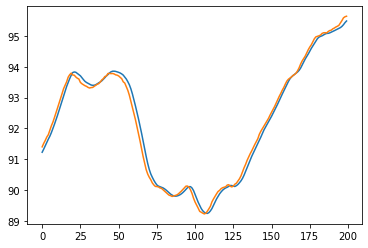

In [18]:
# just the training
plt.plot(train_results['Train_Predictions'][:200])
plt.plot(train_results['Actuals'][:200])

16/16 [==============================] - 0s 1ms/step


,Val_Predictions,Actuals
0,95.300476,95.3354
1,95.287216,95.3287
2,95.280350,95.3083
3,95.273529,95.3333
4,95.274734,95.3454
...,...,...
495,90.787079,91.0012
496,90.905350,91.1050
497,91.017654,91.2146
498,91.128326,91.3029


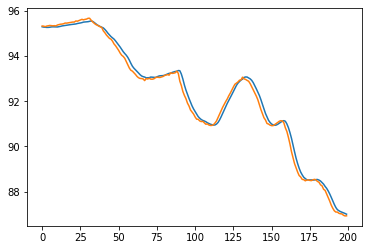

In [20]:
# how about validation
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val_Predictions':val_predictions, 'Actuals':y_val})
display(val_results)

plt.plot(val_results['Val_Predictions'][:200])
plt.plot(val_results['Actuals'][:200])

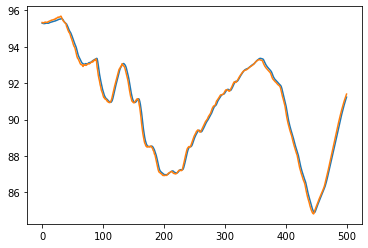

In [21]:
plt.plot(val_results['Val_Predictions'])
plt.plot(val_results['Actuals'])

### Results of single variable model

16/16 [==============================] - 0s 1ms/step


,Test_Predictions,Actuals
0,91.330711,91.4921
1,91.426788,91.5775
2,91.520386,91.6546
3,91.607635,91.7333
4,91.690491,91.7912
...,...,...
495,79.456085,79.4696
496,79.540070,80.0721
497,79.846184,80.4046
498,80.206093,80.6565


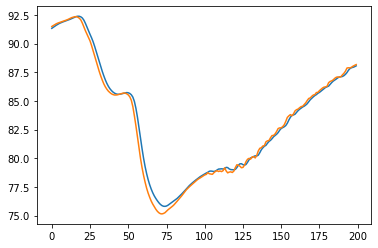

In [23]:
# how about test
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test_Predictions':test_predictions, 'Actuals':y_test})
display(test_results)

plt.plot(test_results['Test_Predictions'][:200])
plt.plot(test_results['Actuals'][:200])

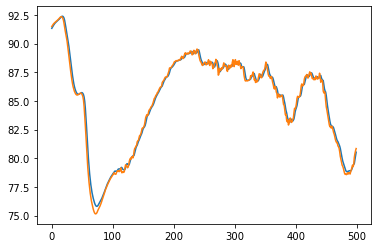

In [24]:
plt.plot(test_results['Test_Predictions'])
plt.plot(test_results['Actuals'])

#### A prettier graph for single variable results:

In [41]:
test_results['date'] = date_rng = pd.date_range(start='2017-01-23', end='2018-06-06', freq='D')
# last 500 days from the df
test_results

,Test_Predictions,Actuals,date
0,91.330711,91.4921,2017-01-23
1,91.426788,91.5775,2017-01-24
2,91.520386,91.6546,2017-01-25
3,91.607635,91.7333,2017-01-26
4,91.690491,91.7912,2017-01-27
...,...,...,...
495,79.456085,79.4696,2018-06-02
496,79.540070,80.0721,2018-06-03
497,79.846184,80.4046,2018-06-04
498,80.206093,80.6565,2018-06-05


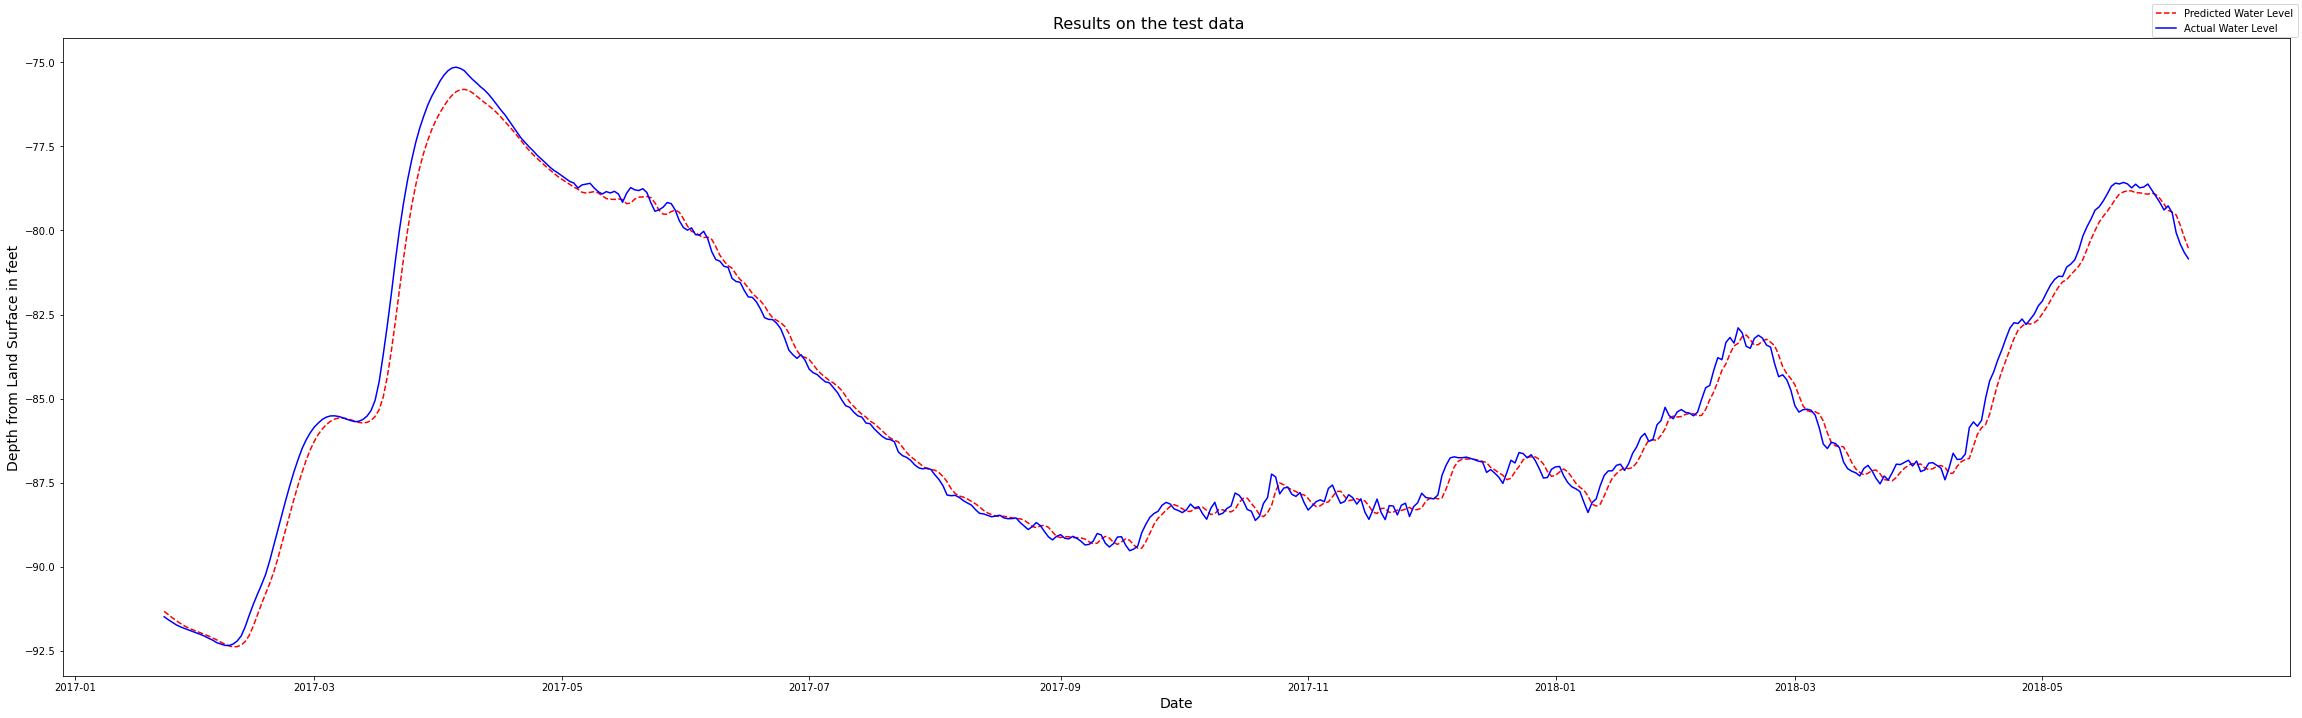

In [45]:
y = test_results.date.values
X = test_results.Test_Predictions.values*-1
X1 = test_results.Actuals.values*-1


fig, ax1 = plt.subplots(figsize=(32, 10)) #big for copy paste reasons
plt.suptitle('Results on the test data', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'r--', label = 'Predicted Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = plt.subplot()
ax2.plot(y,X1, 'b-', label = 'Actual Water Level')

fig.legend()

fig.tight_layout()
plt.show()

## Multivariate tutorial

both of these tutorials skip basically all explanation; I need to go through Marcos' notebooks and whatnot, but below is following the second one listed above. [This one](https://www.youtube.com/watch?v=kGdbPnMCdOg)